In [15]:
def getCompCycles(composition):
    """Return a list of a composition's cyclic forms."""
    comp = list(composition)
    cycleList = [copy(tuple(comp))]
    for i in range(len(comp)-1):
        top = comp.pop(0)
        comp.append(top)
        cycleList.append(copy(tuple(comp)))
    return sorted(cycleList)
    
def getUniqueCompositionCycles(n, k=3):
    """Return a list of unique (up to rotation) k-compositions of [n].
    
    Keyword arguments:
    n -- the size of the integer set
    k -- the length of the composition (default 3)
    """
    compositions = Compositions(n, length=k)
    uniqueComps = []
    compCycleList = []
    for comp in compositions:
        if tuple(comp) in compCycleList:
            continue
        else:
            compCycles = getCompCycles(comp)
            uniqueComps.append(compCycles[0])
            compCycleList.extend(compCycles)
    return sorted(uniqueComps)

def makeGraphDict(vertices, distance):
    """Return a dictionary of vertex-neighbor pairs.
    
    Keyword arguments:
    vertices -- a list of tuples
    distance -- the desired Hamming distance between adjacent vertices
    """
    graphDict = dict()
    k = len(vertices[0])
    for v in vertices:
        edges = [u for u in vertices if len(set(u).intersection(set(v))) == k-distance]
        graphDict[v] = edges
    return graphDict

def createHammingGraph(comp, distance):
    """Return the distance-d Hamming graph constructed from a composition.
    
    Keyword arguments:
    comp -- the consecutive difference sequence that defines the vertices
    distance -- the desired Hamming distance between adjacent vertices
    """
    compList = list(copy(comp))
    n = sum(compList)
    vertices = []
    setVertices = []
    for i in range(0,n):
        newVertex = (i, (i+compList[0])%n, (i+compList[0]+compList[1])%n)
        if set(newVertex) not in setVertices:
            vertices.append(newVertex)
            setVertices.append(set(newVertex))
    graphDict = makeGraphDict(vertices, distance)
    return Graph(graphDict)

def makeGraphListWithDistance(compList, distance):
    """Return a list of Hamming graphs given a list of compositions.
    
    Keyword arguments:
    compList -- a list of rotation-invariant compositions
    distance -- the desired Hamming distance between adjacent vertices
    """
    graphList = []
    for comp in compList:
        G = createHammingGraph(comp, distance)
        graphList.append(G)
    return graphList

def displayHammingGraphsWithDistance(n, k, d):
    """Print all rotationally-unique (n,k) compositions and their d-Hamming graphs.
    
    Keyword arguments:
    n -- integer set size
    k -- composition length
    d -- the desired Hamming distance between adjacent vertices
    """
    print(f'Generating Hamming Graphs for n={n}, k={k}, distance={d}, lambda={k-d}...')
    compList = getUniqueCompositionCycles(n, k)
    graphList = makeGraphListWithDistance(compList, d)
    for (graph, comp) in zip(graphList, compList):
        print(f'Consecutive difference sequence {comp} with distance={d}, lambda={k-d}:')
        graph.show(layout='circular')

def displayHammingGraphs(n, k):
    """Print all rotationally-unique (n,k) compositions and their Hamming graphs, 
    iterating through the distances 1 <= d < k.
    
    Keyword arguments:
    n -- integer set size
    k -- composition length
    """
    print(f'Generating Hamming Graphs for n={n}, k={k}...')
    compList = getUniqueCompositionCycles(n, k)
    for d in range(1, k+1):
        graphList = makeGraphListWithDistance(compList, d)
        for (graph, comp) in zip(graphList, compList):
            print(f'Consecutive difference sequence {comp} with distance={d}, lambda={k-d}:')
            graph.show(layout='circular')

def getCompGraphTupleList(n, k, d):
    """Return a list of composition-graph tuples.
    
    Keyword arguments:
    n -- integer set size
    k -- composition length
    d -- Hamming distance for graph construction
    """
    compList = getUniqueCompositionCycles(n, k)
    graphList = makeGraphListWithDistance(compList, d)
    tupleList = [(C, G) for C, G in zip(compList, graphList)]
    return tupleList

def getHammingIsomorphismClasses(n, k, d):
    """Return a list of isomorphism classes, as lists of compositions 
    that produce isomorphic distance-d Hamming graphs, with a 
    representative graph at index 0 of each list.
    
    Keyword arguments:
    n -- integer set size
    k -- composition length
    d -- Hamming distance for graph construction
    """
    CGList = getCompGraphTupleList(n, k, d)
    indicesToCheck = [i for i in range(0, len(CGList))]
    isoClasses = []
    while len(indicesToCheck) > 0:
        index = indicesToCheck[0]
        isoIndices = [index]
        comp, graph = CGList[index]
        isoClass = [graph, comp]
        for j in indicesToCheck:
            if j <= index:
                continue
            graph2 = CGList[j][1]
            if graph.is_isomorphic(graph2):
                isoIndices.append(j)
                isoClass.append(CGList[j][0])
        for isoIndex in isoIndices:
            indicesToCheck.remove(isoIndex)
        isoClasses.append(isoClass)
    return isoClasses

def displayHammingIsomorphismClasses(n, k, d):
    """Print all rotationally-unique (n,k) compositions with isomorphic distance-d 
    Hamming graphs, along with a representative graph for each isomorphism class 
    and various graph properties associated with that class.
    
    Keyword arguments:
    n -- integer set size
    k -- composition length
    d -- the desired Hamming distance between adjacent vertices
    """
    print(f'Generating isomorphism classes of {n, k} Hamming Graphs with distance {d}...')
    isoClasses = getHammingIsomorphismClasses(n, k, d)
    print(f'Found {len(isoClasses)} unique graphs up to isomorphism.')
    for isoClass in isoClasses:
        print(f'Isomorphic compositions: {isoClass[1:]}')
        repGraph = isoClass[0]
        print(f'Representative distance-{d} graph of order {repGraph.order()}:')
        # various graph properties that may be interesting. Comment out as needed.
        complete = repGraph.is_clique()
        cyclic = repGraph.is_cycle()
        connected = repGraph.is_connected()
        empty = repGraph.size() == 0
        hamiltonian = repGraph.is_hamiltonian()
        print(f'Complete={complete}, Cyclic={cyclic}, Connected={connected}, Empty={empty}, Hamiltonian={hamiltonian}.')
        isoClass[0].show(layout='circular')

def findIsomorphicHammingGraphs(start=53, end=53, k=3):
    """Print all rotationally-unique (n,k) compositions with isomorphic distance-d 
    Hamming graphs, along with a representative graph for each isomorphism class, 
    iterating over n in [start, end].
    
    Keyword arguments:
    start -- starting value of n (default 4)
    end -- the final value of n to be searched (default 20)
    k -- composition length (default 3)
    """
    for n in range(max(k, start), end+1):
        if n in Primes():
            for i in range(0,k):
                displayHammingIsomorphismClasses(n,k,k-i)
            


#

Generating isomorphism classes of (53, 3) Hamming Graphs with distance 3...
Found 9 unique graphs up to isomorphism.
Isomorphic compositions: [(1, 1, 51), (1, 26, 26), (2, 2, 49), (3, 3, 47), (3, 25, 25), (4, 4, 45), (5, 5, 43), (5, 24, 24), (6, 6, 41), (7, 7, 39), (7, 23, 23), (8, 8, 37), (9, 9, 35), (9, 22, 22), (10, 10, 33), (11, 11, 31), (11, 21, 21), (12, 12, 29), (13, 13, 27), (13, 20, 20), (14, 14, 25), (15, 15, 23), (15, 19, 19), (16, 16, 21), (17, 17, 19), (17, 18, 18)]
Representative distance-3 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


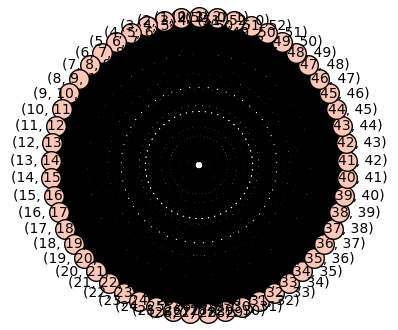

Isomorphic compositions: [(1, 2, 50), (1, 17, 35), (1, 25, 27), (1, 27, 25), (1, 35, 17), (1, 50, 2), (2, 4, 47), (2, 17, 34), (2, 34, 17), (2, 47, 4), (3, 6, 44), (3, 22, 28), (3, 28, 22), (3, 44, 6), (4, 8, 41), (4, 15, 34), (4, 34, 15), (4, 41, 8), (5, 10, 38), (5, 16, 32), (5, 19, 29), (5, 29, 19), (5, 32, 16), (5, 38, 10), (6, 12, 35), (6, 35, 12), (7, 13, 33), (7, 14, 32), (7, 16, 30), (7, 30, 16), (7, 32, 14), (7, 33, 13), (8, 15, 30), (8, 16, 29), (8, 29, 16), (8, 30, 15), (9, 13, 31), (9, 18, 26), (9, 26, 18), (9, 31, 13), (10, 11, 32), (10, 20, 23), (10, 23, 20), (10, 32, 11), (11, 14, 28), (11, 20, 22), (11, 22, 20), (11, 28, 14), (12, 17, 24), (12, 24, 17), (13, 14, 26), (13, 26, 14)]
Representative distance-3 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


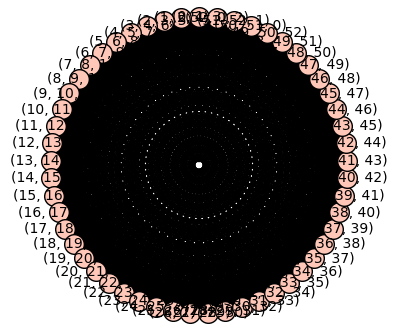

Isomorphic compositions: [(1, 3, 49), (1, 13, 39), (1, 18, 34), (1, 34, 18), (1, 39, 13), (1, 49, 3), (2, 6, 45), (2, 15, 36), (2, 25, 26), (2, 26, 25), (2, 36, 15), (2, 45, 6), (3, 9, 41), (3, 11, 39), (3, 39, 11), (3, 41, 9), (4, 12, 37), (4, 19, 30), (4, 30, 19), (4, 37, 12), (5, 11, 37), (5, 12, 36), (5, 15, 33), (5, 33, 15), (5, 36, 12), (5, 37, 11), (6, 18, 29), (6, 22, 25), (6, 25, 22), (6, 29, 18), (7, 8, 38), (7, 20, 26), (7, 21, 25), (7, 25, 21), (7, 26, 20), (7, 38, 8), (8, 21, 24), (8, 24, 21), (9, 11, 33), (9, 17, 27), (9, 27, 17), (9, 33, 11), (10, 13, 30), (10, 19, 24), (10, 21, 22), (10, 22, 21), (10, 24, 19), (10, 30, 13), (13, 18, 22), (13, 22, 18), (14, 16, 23), (14, 23, 16)]
Representative distance-3 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


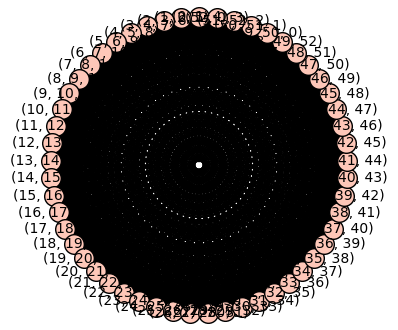

Isomorphic compositions: [(1, 4, 48), (1, 12, 40), (1, 21, 31), (1, 31, 21), (1, 40, 12), (1, 48, 4), (2, 8, 43), (2, 9, 42), (2, 24, 27), (2, 27, 24), (2, 42, 9), (2, 43, 8), (3, 10, 40), (3, 12, 38), (3, 14, 36), (3, 36, 14), (3, 38, 12), (3, 40, 10), (4, 16, 33), (4, 18, 31), (4, 31, 18), (4, 33, 16), (5, 7, 41), (5, 20, 28), (5, 28, 20), (5, 41, 7), (6, 19, 28), (6, 20, 27), (6, 23, 24), (6, 24, 23), (6, 27, 20), (6, 28, 19), (7, 15, 31), (7, 18, 28), (7, 28, 18), (7, 31, 15), (8, 9, 36), (8, 13, 32), (8, 32, 13), (8, 36, 9), (9, 14, 30), (9, 30, 14), (10, 14, 29), (10, 29, 14), (11, 16, 26), (11, 19, 23), (11, 23, 19), (11, 26, 16), (15, 17, 21), (15, 21, 17), (16, 18, 19), (16, 19, 18)]
Representative distance-3 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


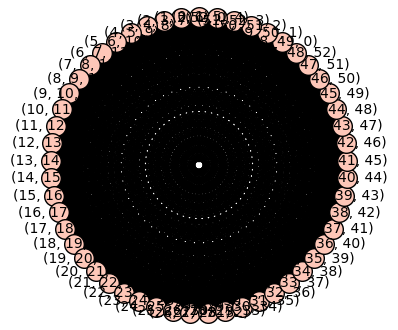

Isomorphic compositions: [(1, 5, 47), (1, 8, 44), (1, 20, 32), (1, 32, 20), (1, 44, 8), (1, 47, 5), (2, 10, 41), (2, 11, 40), (2, 16, 35), (2, 35, 16), (2, 40, 11), (2, 41, 10), (3, 7, 43), (3, 15, 35), (3, 24, 26), (3, 26, 24), (3, 35, 15), (3, 43, 7), (4, 17, 32), (4, 20, 29), (4, 22, 27), (4, 27, 22), (4, 29, 20), (4, 32, 17), (5, 8, 40), (5, 23, 25), (5, 25, 23), (5, 40, 8), (6, 14, 33), (6, 17, 30), (6, 30, 17), (6, 33, 14), (7, 11, 35), (7, 12, 34), (7, 34, 12), (7, 35, 11), (8, 11, 34), (8, 34, 11), (9, 19, 25), (9, 21, 23), (9, 23, 21), (9, 25, 19), (10, 16, 27), (10, 27, 16), (12, 13, 28), (12, 28, 13), (14, 15, 24), (14, 17, 22), (14, 22, 17), (14, 24, 15), (15, 16, 22), (15, 22, 16)]
Representative distance-3 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


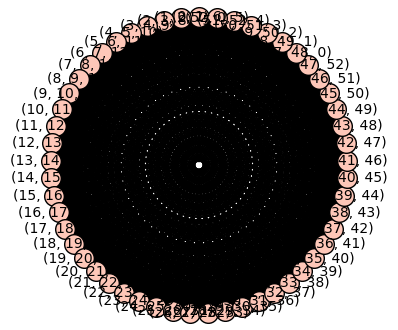

Isomorphic compositions: [(1, 6, 46), (1, 9, 43), (1, 15, 37), (1, 37, 15), (1, 43, 9), (1, 46, 6), (2, 12, 39), (2, 18, 33), (2, 21, 30), (2, 30, 21), (2, 33, 18), (2, 39, 12), (3, 5, 45), (3, 18, 32), (3, 23, 27), (3, 27, 23), (3, 32, 18), (3, 45, 5), (4, 7, 42), (4, 13, 36), (4, 24, 25), (4, 25, 24), (4, 36, 13), (4, 42, 7), (5, 18, 30), (5, 22, 26), (5, 26, 22), (5, 30, 18), (6, 10, 37), (6, 11, 36), (6, 36, 11), (6, 37, 10), (7, 10, 36), (7, 36, 10), (8, 14, 31), (8, 19, 26), (8, 26, 19), (8, 31, 14), (9, 15, 29), (9, 16, 28), (9, 28, 16), (9, 29, 15), (11, 13, 29), (11, 29, 13), (12, 19, 22), (12, 20, 21), (12, 21, 20), (12, 22, 19), (13, 15, 25), (13, 25, 15), (14, 19, 20), (14, 20, 19)]
Representative distance-3 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


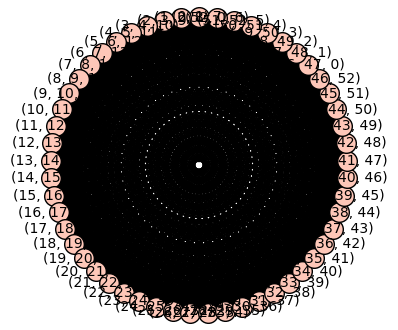

Isomorphic compositions: [(1, 7, 45), (1, 14, 38), (1, 19, 33), (1, 33, 19), (1, 38, 14), (1, 45, 7), (2, 13, 38), (2, 14, 37), (2, 23, 28), (2, 28, 23), (2, 37, 14), (2, 38, 13), (3, 4, 46), (3, 8, 42), (3, 21, 29), (3, 29, 21), (3, 42, 8), (3, 46, 4), (4, 21, 28), (4, 23, 26), (4, 26, 23), (4, 28, 21), (5, 6, 42), (5, 13, 35), (5, 17, 31), (5, 31, 17), (5, 35, 13), (5, 42, 6), (6, 8, 39), (6, 16, 31), (6, 31, 16), (6, 39, 8), (7, 19, 27), (7, 27, 19), (9, 10, 34), (9, 12, 32), (9, 20, 24), (9, 24, 20), (9, 32, 12), (9, 34, 10), (10, 12, 31), (10, 17, 26), (10, 26, 17), (10, 31, 12), (11, 18, 24), (11, 24, 18), (12, 16, 25), (12, 25, 16), (13, 17, 23), (13, 23, 17), (15, 18, 20), (15, 20, 18)]
Representative distance-3 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


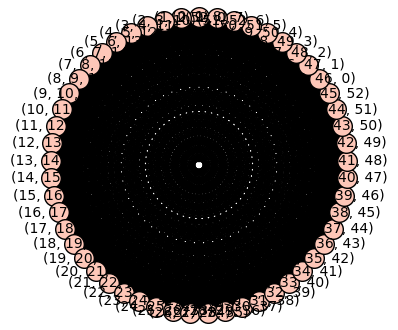

Isomorphic compositions: [(1, 10, 42), (1, 16, 36), (1, 24, 28), (1, 28, 24), (1, 36, 16), (1, 42, 10), (2, 3, 48), (2, 19, 32), (2, 20, 31), (2, 31, 20), (2, 32, 19), (2, 48, 3), (3, 19, 31), (3, 20, 30), (3, 30, 20), (3, 31, 19), (4, 6, 43), (4, 9, 40), (4, 11, 38), (4, 38, 11), (4, 40, 9), (4, 43, 6), (5, 14, 34), (5, 21, 27), (5, 27, 21), (5, 34, 14), (6, 7, 40), (6, 9, 38), (6, 38, 9), (6, 40, 7), (7, 9, 37), (7, 17, 29), (7, 29, 17), (7, 37, 9), (8, 12, 33), (8, 18, 27), (8, 22, 23), (8, 23, 22), (8, 27, 18), (8, 33, 12), (10, 15, 28), (10, 28, 15), (11, 17, 25), (11, 25, 17), (12, 14, 27), (12, 18, 23), (12, 23, 18), (12, 27, 14), (13, 16, 24), (13, 24, 16), (14, 18, 21), (14, 21, 18)]
Representative distance-3 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


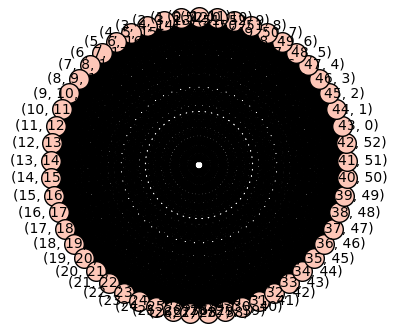

Isomorphic compositions: [(1, 11, 41), (1, 22, 30), (1, 23, 29), (1, 29, 23), (1, 30, 22), (1, 41, 11), (2, 5, 46), (2, 7, 44), (2, 22, 29), (2, 29, 22), (2, 44, 7), (2, 46, 5), (3, 13, 37), (3, 16, 34), (3, 17, 33), (3, 33, 17), (3, 34, 16), (3, 37, 13), (4, 5, 44), (4, 10, 39), (4, 14, 35), (4, 35, 14), (4, 39, 10), (4, 44, 5), (5, 9, 39), (5, 39, 9), (6, 13, 34), (6, 15, 32), (6, 21, 26), (6, 26, 21), (6, 32, 15), (6, 34, 13), (7, 22, 24), (7, 24, 22), (8, 10, 35), (8, 17, 28), (8, 20, 25), (8, 25, 20), (8, 28, 17), (8, 35, 10), (10, 18, 25), (10, 25, 18), (11, 12, 30), (11, 15, 27), (11, 27, 15), (11, 30, 12), (12, 15, 26), (12, 26, 15), (13, 19, 21), (13, 21, 19), (16, 17, 20), (16, 20, 17)]
Representative distance-3 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


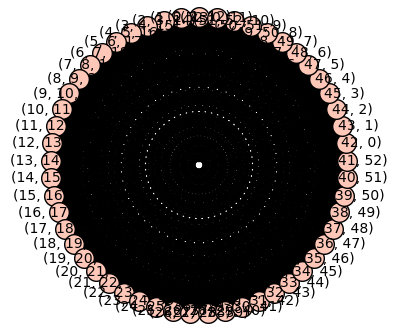

Generating isomorphism classes of (53, 3) Hamming Graphs with distance 2...
Found 9 unique graphs up to isomorphism.
Isomorphic compositions: [(1, 1, 51), (1, 26, 26), (2, 2, 49), (3, 3, 47), (3, 25, 25), (4, 4, 45), (5, 5, 43), (5, 24, 24), (6, 6, 41), (7, 7, 39), (7, 23, 23), (8, 8, 37), (9, 9, 35), (9, 22, 22), (10, 10, 33), (11, 11, 31), (11, 21, 21), (12, 12, 29), (13, 13, 27), (13, 20, 20), (14, 14, 25), (15, 15, 23), (15, 19, 19), (16, 16, 21), (17, 17, 19), (17, 18, 18)]
Representative distance-2 graph of order 53:
Complete=False, Cyclic=True, Connected=True, Empty=False, Hamiltonian=True.


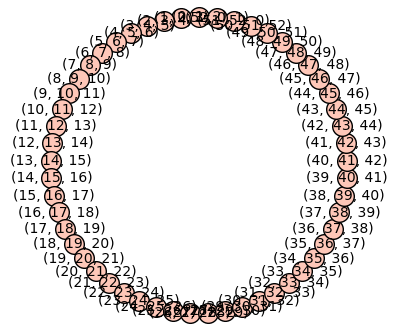

Isomorphic compositions: [(1, 2, 50), (1, 17, 35), (1, 25, 27), (1, 27, 25), (1, 35, 17), (1, 50, 2), (2, 4, 47), (2, 17, 34), (2, 34, 17), (2, 47, 4), (3, 6, 44), (3, 22, 28), (3, 28, 22), (3, 44, 6), (4, 8, 41), (4, 15, 34), (4, 34, 15), (4, 41, 8), (5, 10, 38), (5, 16, 32), (5, 19, 29), (5, 29, 19), (5, 32, 16), (5, 38, 10), (6, 12, 35), (6, 35, 12), (7, 13, 33), (7, 14, 32), (7, 16, 30), (7, 30, 16), (7, 32, 14), (7, 33, 13), (8, 15, 30), (8, 16, 29), (8, 29, 16), (8, 30, 15), (9, 13, 31), (9, 18, 26), (9, 26, 18), (9, 31, 13), (10, 11, 32), (10, 20, 23), (10, 23, 20), (10, 32, 11), (11, 14, 28), (11, 20, 22), (11, 22, 20), (11, 28, 14), (12, 17, 24), (12, 24, 17), (13, 14, 26), (13, 26, 14)]
Representative distance-2 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


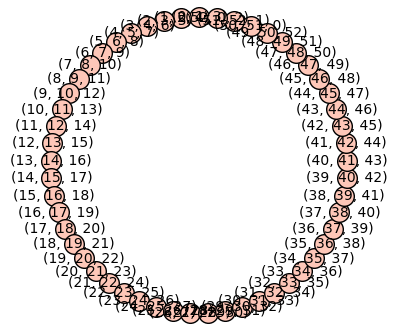

Isomorphic compositions: [(1, 3, 49), (1, 13, 39), (1, 18, 34), (1, 34, 18), (1, 39, 13), (1, 49, 3), (2, 6, 45), (2, 15, 36), (2, 25, 26), (2, 26, 25), (2, 36, 15), (2, 45, 6), (3, 9, 41), (3, 11, 39), (3, 39, 11), (3, 41, 9), (4, 12, 37), (4, 19, 30), (4, 30, 19), (4, 37, 12), (5, 11, 37), (5, 12, 36), (5, 15, 33), (5, 33, 15), (5, 36, 12), (5, 37, 11), (6, 18, 29), (6, 22, 25), (6, 25, 22), (6, 29, 18), (7, 8, 38), (7, 20, 26), (7, 21, 25), (7, 25, 21), (7, 26, 20), (7, 38, 8), (8, 21, 24), (8, 24, 21), (9, 11, 33), (9, 17, 27), (9, 27, 17), (9, 33, 11), (10, 13, 30), (10, 19, 24), (10, 21, 22), (10, 22, 21), (10, 24, 19), (10, 30, 13), (13, 18, 22), (13, 22, 18), (14, 16, 23), (14, 23, 16)]
Representative distance-2 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


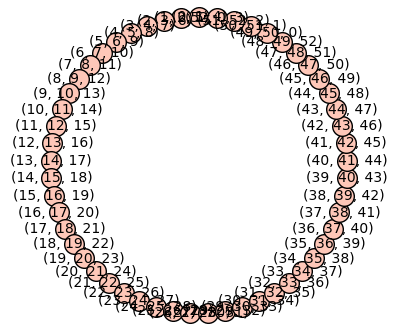

Isomorphic compositions: [(1, 4, 48), (1, 12, 40), (1, 21, 31), (1, 31, 21), (1, 40, 12), (1, 48, 4), (2, 8, 43), (2, 9, 42), (2, 24, 27), (2, 27, 24), (2, 42, 9), (2, 43, 8), (3, 10, 40), (3, 12, 38), (3, 14, 36), (3, 36, 14), (3, 38, 12), (3, 40, 10), (4, 16, 33), (4, 18, 31), (4, 31, 18), (4, 33, 16), (5, 7, 41), (5, 20, 28), (5, 28, 20), (5, 41, 7), (6, 19, 28), (6, 20, 27), (6, 23, 24), (6, 24, 23), (6, 27, 20), (6, 28, 19), (7, 15, 31), (7, 18, 28), (7, 28, 18), (7, 31, 15), (8, 9, 36), (8, 13, 32), (8, 32, 13), (8, 36, 9), (9, 14, 30), (9, 30, 14), (10, 14, 29), (10, 29, 14), (11, 16, 26), (11, 19, 23), (11, 23, 19), (11, 26, 16), (15, 17, 21), (15, 21, 17), (16, 18, 19), (16, 19, 18)]
Representative distance-2 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


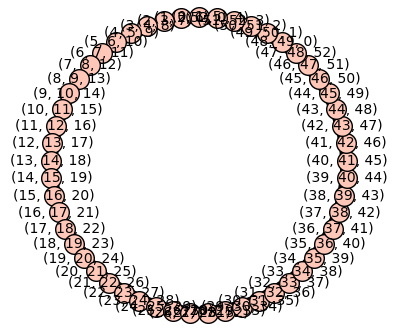

Isomorphic compositions: [(1, 5, 47), (1, 8, 44), (1, 20, 32), (1, 32, 20), (1, 44, 8), (1, 47, 5), (2, 10, 41), (2, 11, 40), (2, 16, 35), (2, 35, 16), (2, 40, 11), (2, 41, 10), (3, 7, 43), (3, 15, 35), (3, 24, 26), (3, 26, 24), (3, 35, 15), (3, 43, 7), (4, 17, 32), (4, 20, 29), (4, 22, 27), (4, 27, 22), (4, 29, 20), (4, 32, 17), (5, 8, 40), (5, 23, 25), (5, 25, 23), (5, 40, 8), (6, 14, 33), (6, 17, 30), (6, 30, 17), (6, 33, 14), (7, 11, 35), (7, 12, 34), (7, 34, 12), (7, 35, 11), (8, 11, 34), (8, 34, 11), (9, 19, 25), (9, 21, 23), (9, 23, 21), (9, 25, 19), (10, 16, 27), (10, 27, 16), (12, 13, 28), (12, 28, 13), (14, 15, 24), (14, 17, 22), (14, 22, 17), (14, 24, 15), (15, 16, 22), (15, 22, 16)]
Representative distance-2 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


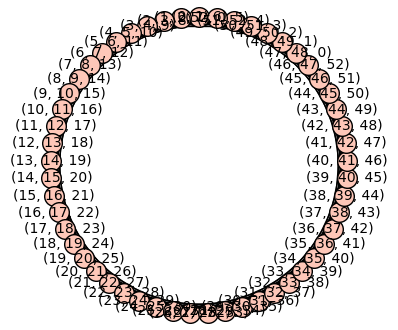

Isomorphic compositions: [(1, 6, 46), (1, 9, 43), (1, 15, 37), (1, 37, 15), (1, 43, 9), (1, 46, 6), (2, 12, 39), (2, 18, 33), (2, 21, 30), (2, 30, 21), (2, 33, 18), (2, 39, 12), (3, 5, 45), (3, 18, 32), (3, 23, 27), (3, 27, 23), (3, 32, 18), (3, 45, 5), (4, 7, 42), (4, 13, 36), (4, 24, 25), (4, 25, 24), (4, 36, 13), (4, 42, 7), (5, 18, 30), (5, 22, 26), (5, 26, 22), (5, 30, 18), (6, 10, 37), (6, 11, 36), (6, 36, 11), (6, 37, 10), (7, 10, 36), (7, 36, 10), (8, 14, 31), (8, 19, 26), (8, 26, 19), (8, 31, 14), (9, 15, 29), (9, 16, 28), (9, 28, 16), (9, 29, 15), (11, 13, 29), (11, 29, 13), (12, 19, 22), (12, 20, 21), (12, 21, 20), (12, 22, 19), (13, 15, 25), (13, 25, 15), (14, 19, 20), (14, 20, 19)]
Representative distance-2 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


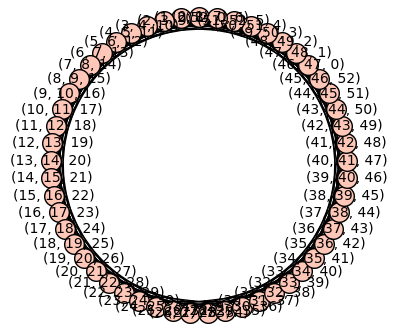

Isomorphic compositions: [(1, 7, 45), (1, 14, 38), (1, 19, 33), (1, 33, 19), (1, 38, 14), (1, 45, 7), (2, 13, 38), (2, 14, 37), (2, 23, 28), (2, 28, 23), (2, 37, 14), (2, 38, 13), (3, 4, 46), (3, 8, 42), (3, 21, 29), (3, 29, 21), (3, 42, 8), (3, 46, 4), (4, 21, 28), (4, 23, 26), (4, 26, 23), (4, 28, 21), (5, 6, 42), (5, 13, 35), (5, 17, 31), (5, 31, 17), (5, 35, 13), (5, 42, 6), (6, 8, 39), (6, 16, 31), (6, 31, 16), (6, 39, 8), (7, 19, 27), (7, 27, 19), (9, 10, 34), (9, 12, 32), (9, 20, 24), (9, 24, 20), (9, 32, 12), (9, 34, 10), (10, 12, 31), (10, 17, 26), (10, 26, 17), (10, 31, 12), (11, 18, 24), (11, 24, 18), (12, 16, 25), (12, 25, 16), (13, 17, 23), (13, 23, 17), (15, 18, 20), (15, 20, 18)]
Representative distance-2 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


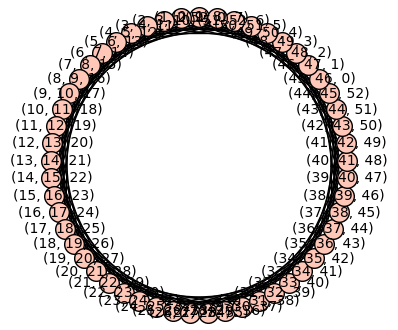

Isomorphic compositions: [(1, 10, 42), (1, 16, 36), (1, 24, 28), (1, 28, 24), (1, 36, 16), (1, 42, 10), (2, 3, 48), (2, 19, 32), (2, 20, 31), (2, 31, 20), (2, 32, 19), (2, 48, 3), (3, 19, 31), (3, 20, 30), (3, 30, 20), (3, 31, 19), (4, 6, 43), (4, 9, 40), (4, 11, 38), (4, 38, 11), (4, 40, 9), (4, 43, 6), (5, 14, 34), (5, 21, 27), (5, 27, 21), (5, 34, 14), (6, 7, 40), (6, 9, 38), (6, 38, 9), (6, 40, 7), (7, 9, 37), (7, 17, 29), (7, 29, 17), (7, 37, 9), (8, 12, 33), (8, 18, 27), (8, 22, 23), (8, 23, 22), (8, 27, 18), (8, 33, 12), (10, 15, 28), (10, 28, 15), (11, 17, 25), (11, 25, 17), (12, 14, 27), (12, 18, 23), (12, 23, 18), (12, 27, 14), (13, 16, 24), (13, 24, 16), (14, 18, 21), (14, 21, 18)]
Representative distance-2 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


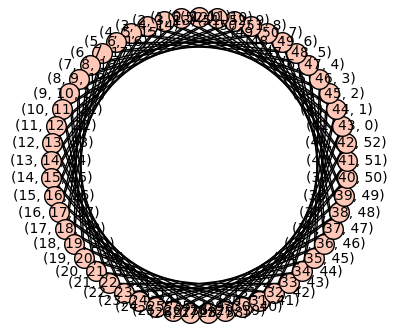

Isomorphic compositions: [(1, 11, 41), (1, 22, 30), (1, 23, 29), (1, 29, 23), (1, 30, 22), (1, 41, 11), (2, 5, 46), (2, 7, 44), (2, 22, 29), (2, 29, 22), (2, 44, 7), (2, 46, 5), (3, 13, 37), (3, 16, 34), (3, 17, 33), (3, 33, 17), (3, 34, 16), (3, 37, 13), (4, 5, 44), (4, 10, 39), (4, 14, 35), (4, 35, 14), (4, 39, 10), (4, 44, 5), (5, 9, 39), (5, 39, 9), (6, 13, 34), (6, 15, 32), (6, 21, 26), (6, 26, 21), (6, 32, 15), (6, 34, 13), (7, 22, 24), (7, 24, 22), (8, 10, 35), (8, 17, 28), (8, 20, 25), (8, 25, 20), (8, 28, 17), (8, 35, 10), (10, 18, 25), (10, 25, 18), (11, 12, 30), (11, 15, 27), (11, 27, 15), (11, 30, 12), (12, 15, 26), (12, 26, 15), (13, 19, 21), (13, 21, 19), (16, 17, 20), (16, 20, 17)]
Representative distance-2 graph of order 53:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


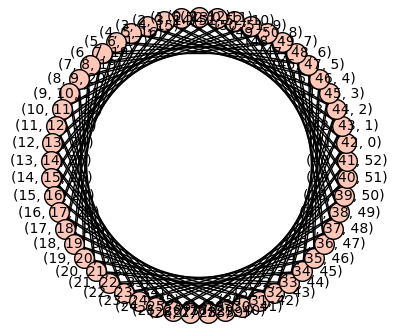

Generating isomorphism classes of (53, 3) Hamming Graphs with distance 1...
Found 2 unique graphs up to isomorphism.
Isomorphic compositions: [(1, 1, 51), (1, 26, 26), (2, 2, 49), (3, 3, 47), (3, 25, 25), (4, 4, 45), (5, 5, 43), (5, 24, 24), (6, 6, 41), (7, 7, 39), (7, 23, 23), (8, 8, 37), (9, 9, 35), (9, 22, 22), (10, 10, 33), (11, 11, 31), (11, 21, 21), (12, 12, 29), (13, 13, 27), (13, 20, 20), (14, 14, 25), (15, 15, 23), (15, 19, 19), (16, 16, 21), (17, 17, 19), (17, 18, 18)]
Representative distance-1 graph of order 53:
Complete=False, Cyclic=True, Connected=True, Empty=False, Hamiltonian=True.


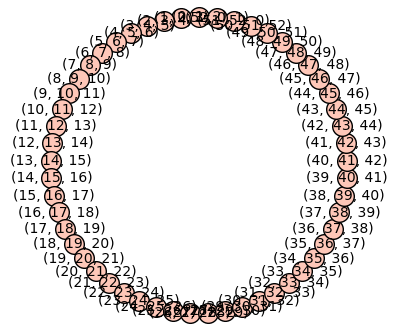

Isomorphic compositions: [(1, 2, 50), (1, 3, 49), (1, 4, 48), (1, 5, 47), (1, 6, 46), (1, 7, 45), (1, 8, 44), (1, 9, 43), (1, 10, 42), (1, 11, 41), (1, 12, 40), (1, 13, 39), (1, 14, 38), (1, 15, 37), (1, 16, 36), (1, 17, 35), (1, 18, 34), (1, 19, 33), (1, 20, 32), (1, 21, 31), (1, 22, 30), (1, 23, 29), (1, 24, 28), (1, 25, 27), (1, 27, 25), (1, 28, 24), (1, 29, 23), (1, 30, 22), (1, 31, 21), (1, 32, 20), (1, 33, 19), (1, 34, 18), (1, 35, 17), (1, 36, 16), (1, 37, 15), (1, 38, 14), (1, 39, 13), (1, 40, 12), (1, 41, 11), (1, 42, 10), (1, 43, 9), (1, 44, 8), (1, 45, 7), (1, 46, 6), (1, 47, 5), (1, 48, 4), (1, 49, 3), (1, 50, 2), (2, 3, 48), (2, 4, 47), (2, 5, 46), (2, 6, 45), (2, 7, 44), (2, 8, 43), (2, 9, 42), (2, 10, 41), (2, 11, 40), (2, 12, 39), (2, 13, 38), (2, 14, 37), (2, 15, 36), (2, 16, 35), (2, 17, 34), (2, 18, 33), (2, 19, 32), (2, 20, 31), (2, 21, 30), (2, 22, 29), (2, 23, 28), (2, 24, 27), (2, 25, 26), (2, 26, 25), (2, 27, 24), (2, 28, 23), (2, 29, 22), (2, 30, 21), (2, 31, 2

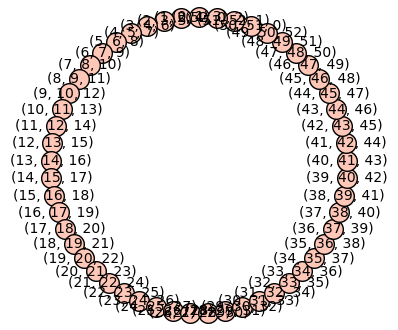

In [16]:
findIsomorphicHammingGraphs(end=53)